In [50]:
#Topic: Fitness Training Recommendation System

In [51]:
#1. Fuzzy Variables (Inputs and Outputs | antecedent consequent):
#Fitness Level: Represents the user's current fitness level, defined with fuzzy sets: 'beginner', 'intermediate', and 'advanced'.
#Workout Intensity: Represents the intensity of the workout, with fuzzy sets: 'low', 'medium', and 'high'.
#Recommended Training: The output (consequent) that suggests the level of training, with fuzzy sets: 'light', 'moderate', and 'intense'.

#2. Fuzzy Rules:
#Rule 1: If the fitness level is 'beginner' OR workout intensity is 'high',
#then recommend 'light' training.
#Rule 2: If the fitness level is 'intermediate', recommend 'moderate' training.
#Rule 3: If the fitness level is 'advanced' OR workout intensity is 'low',
#then recommend 'intense' training.
#Rule 4: If the fitness level is 'beginner' AND workout intensity is 'medium',
#then recommend 'light' training.

#3. Inference and Defuzzification:
#The fuzzy rules process the input variables to produce a fuzzy output, which is subsequently 
#converted into a precise value through various defuzzification techniques. In this scenario,
#five different defuzzification methods (centroid, bisector, mean of maximum, smallest of maximum,
#and largest of maximum) are utilized, and their outcomes are visualized to illustrate the impact of
#each method on the final output recommendation.

#4. Graphical Visualization:
#Visualize the membership functions for fitness level, workout intensity,
#and recommended training. Display the defuzzification process to compare the outputs.

In [52]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Inputs and Outputs
fitness_level = ctrl.Antecedent(np.arange(0, 11, 1), 'fitness_level')
workout_intensity = ctrl.Antecedent(np.arange(0, 11, 1), 'workout_intensity')
recommended_training = ctrl.Consequent(np.arange(0, 11, 1), 'recommended_training')


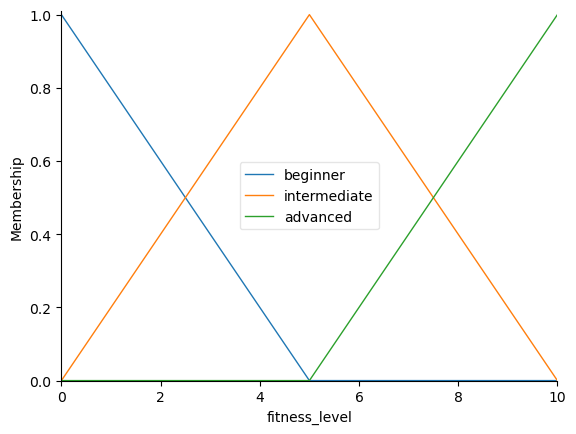

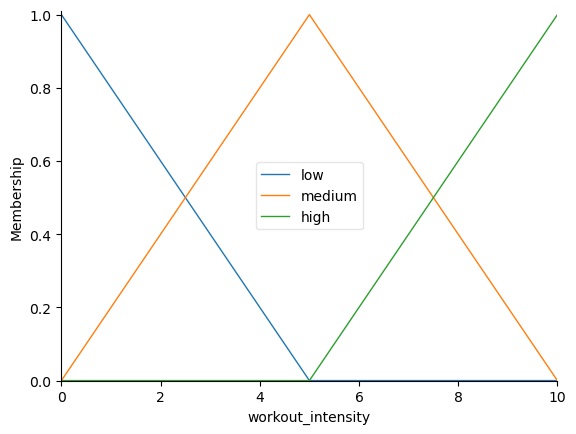

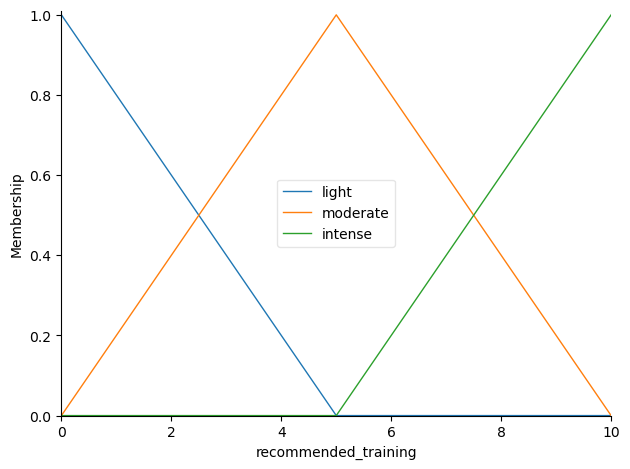

In [53]:
# Fuzzy Sets for Fitness Level
fitness_level['beginner'] = fuzz.trimf(fitness_level.universe, [0, 0, 5])
fitness_level['intermediate'] = fuzz.trimf(fitness_level.universe, [0, 5, 10])
fitness_level['advanced'] = fuzz.trimf(fitness_level.universe, [5, 10, 10])

# Fuzzy Sets for Workout Intensity
workout_intensity['low'] = fuzz.trimf(workout_intensity.universe, [0, 0, 5])
workout_intensity['medium'] = fuzz.trimf(workout_intensity.universe, [0, 5, 10])
workout_intensity['high'] = fuzz.trimf(workout_intensity.universe, [5, 10, 10])

# Fuzzy Sets for Recommended Training
recommended_training['light'] = fuzz.trimf(recommended_training.universe, [0, 0, 5])
recommended_training['moderate'] = fuzz.trimf(recommended_training.universe, [0, 5, 10])
recommended_training['intense'] = fuzz.trimf(recommended_training.universe, [5, 10, 10])

# Visualize the membership functions
# Plot each fuzzy variable on its own subplot
fitness_level.view(ax=ax[0])
workout_intensity.view(ax=ax[1])
recommended_training.view(ax=ax[2])

# Set titles for each subplot
ax[0].set_title('Fitness Level')
ax[1].set_title('Workout Intensity')
ax[2].set_title('Recommended Training')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Show all plots together

In [54]:
# 2. Fuzzy Rules:
rule1 = ctrl.Rule(fitness_level['beginner'] | workout_intensity['high'], recommended_training['light'])
rule2 = ctrl.Rule(fitness_level['intermediate'], recommended_training['moderate'])
rule3 = ctrl.Rule(fitness_level['advanced'] | workout_intensity['low'], recommended_training['intense'])
rule4 = ctrl.Rule(fitness_level['beginner'] & workout_intensity['medium'], recommended_training['light'])


In [55]:
# Create the control system
training_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

# Create a ControlSystemSimulation object
training_system = ctrl.ControlSystemSimulation(training_control)

# Test with multiple example inputs
test_cases = [
    (4, 7),  # Example 1: User has fitness level of 4 (intermediate) and workout intensity of 7 (high)
    (2, 5),  # Example 2: User has fitness level of 2 (beginner) and workout intensity of 5 (medium)
    (8, 2),  # Example 3: User has fitness level of 8 (advanced) and workout intensity of 2 (low)
]

for fitness, intensity in test_cases:
    # Set inputs
    training_system.input['fitness_level'] = fitness
    training_system.input['workout_intensity'] = intensity

    # Do the calculations
    training_system.compute()

    # Display the recommended training level
    print(f'For fitness level {fitness} and workout intensity {intensity}:')
    print(f'Recommended training level: {training_system.output["recommended_training"]}\n')
    
    # Visualize the recommended training level
    recommended_training.view(sim=training_system)

For fitness level 4 and workout intensity 7:
Recommended training level: 4.666666666666668

For fitness level 2 and workout intensity 5:
Recommended training level: 4.121951219512195

For fitness level 8 and workout intensity 2:
Recommended training level: 5.878048780487805



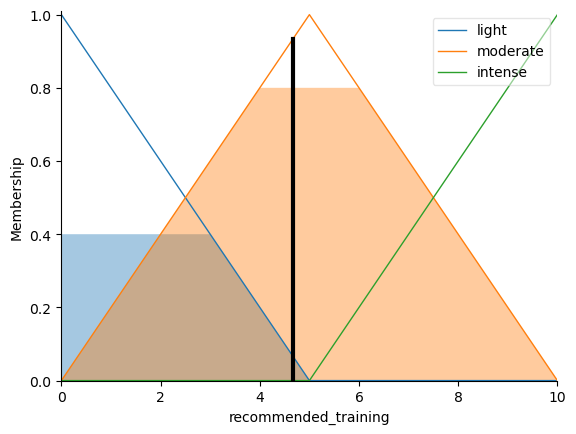

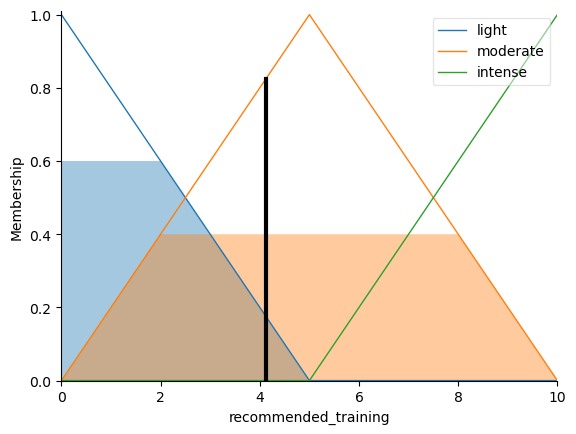

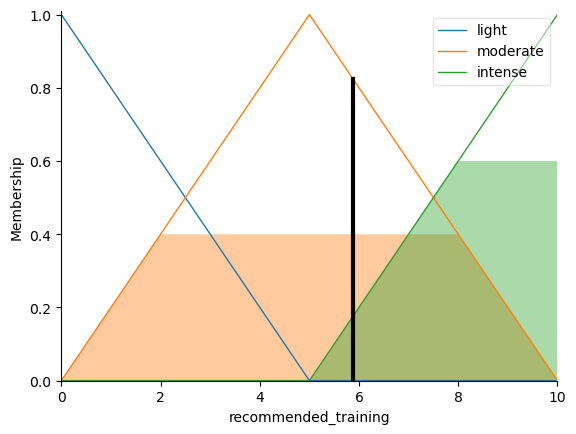

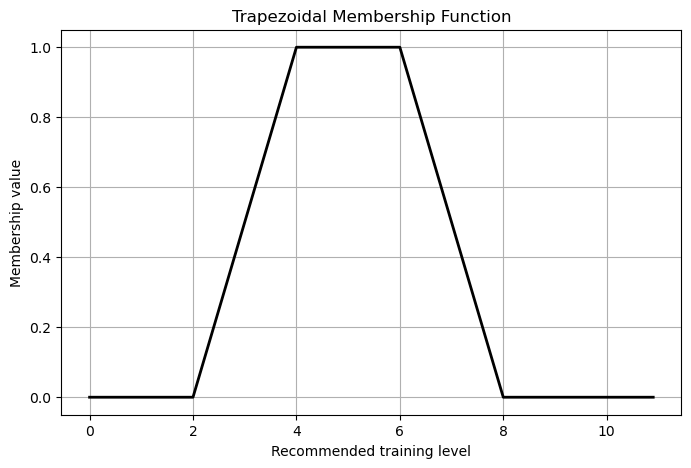

Defuzzification values:
Centroid: 5.000000000000001
Bisector: 5.0
Mean of Maximum: 5.0
Min of Maximum: 4.0
Max of Maximum: 6.0


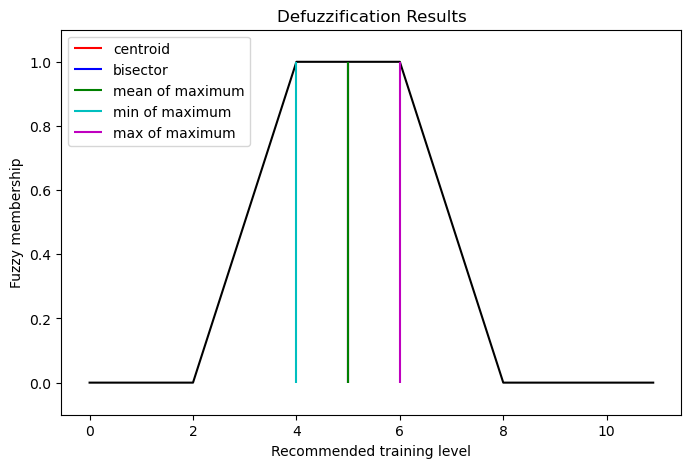

In [56]:
# 3. Inference and Defuzzification:
# Generate a trapezoidal membership function for visualization
x = np.arange(0, 11, 0.1)  # Increase the resolution of the input range
mfx = fuzz.trapmf(x, [2, 4, 6, 8])  # Example trapezoidal membership function for recommended training

# Visualize the membership function
plt.figure(figsize=(8, 5))
plt.plot(x, mfx, 'k', linewidth=2)  # Plot the membership function
plt.title('Trapezoidal Membership Function')
plt.xlabel('Recommended training level')
plt.ylabel('Membership value')
plt.grid()
plt.show()

# Defuzzify this membership function using different methods
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid') 
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Print the defuzzification values
print(f"Defuzzification values:")
print(f"Centroid: {defuzz_centroid}")
print(f"Bisector: {defuzz_bisector}")
print(f"Mean of Maximum: {defuzz_mom}")
print(f"Min of Maximum: {defuzz_som}")
print(f"Max of Maximum: {defuzz_lom}")

# Collect information for vertical lines in the plot
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum', 'max of maximum']
xvals = [defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against the membership function
plt.figure(figsize=(8, 5))

plt.plot(x, mfx, 'k')  # Plot the trapezoidal membership function
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)  # Draw vertical lines at defuzzification points

# Format the plot
plt.ylabel('Fuzzy membership')
plt.xlabel('Recommended training level')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)
plt.title('Defuzzification Results')
plt.show()

In [57]:
## Conclusion

#In this Programming tutorial, we have successfully created a fuzzy logic-based training
#recommendation system. We defined fuzzy variables for fitness level and workout intensity,
#established rules for inference, and visualized the defuzzification process. 
#This approach enables personalized training recommendations, addressing the diverse needs 
#of users. By leveraging fuzzy logic, we can effectively manage uncertainty
#in fitness assessments. 